In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import glob
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator

#Image Data Generator w/ no augmentation
#Scaling for pixels
piece_train_datagen = ImageDataGenerator(
    rescale = 1./255)
piece_test_datagen = ImageDataGenerator(
    rescale = 1./255)
piece_valid_datagen = ImageDataGenerator(
    rescale = 1./255)


#Flow data from directory

piece_train_iter = piece_train_datagen.flow_from_directory(
    directory = 'data/piece_data/train',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    seed=42
)

piece_test_iter = piece_test_datagen.flow_from_directory(
    directory = 'data/piece_data/test',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    shuffle=False,
    seed=42
)

piece_valid_iter = piece_valid_datagen.flow_from_directory(
    directory = 'data/piece_data/valid',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    seed=42
)

Found 1227 images belonging to 7 classes.
Found 335 images belonging to 7 classes.
Found 331 images belonging to 7 classes.


In [3]:
#Define NN architecture

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

piece_model = Sequential()
piece_model.add(Conv2D(filters=16, kernel_size=5, padding='same', activation='relu', 
                        input_shape=(135, 135, 1)))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
piece_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Dropout(0.3))
piece_model.add(GlobalAveragePooling2D())
piece_model.add(Dense(2048, activation='relu'))
piece_model.add(Dense(2048, activation='relu'))
piece_model.add(Dropout(0.4))
piece_model.add(Dense(7, activation='softmax'))


piece_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 135, 135, 16)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 67, 67, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 67, 67, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 67, 67, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 33, 33, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        8256      
__________

In [4]:
# compile the model
from keras.optimizers import RMSprop
piece_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.00001), 
                  metrics=['accuracy'])

STEP_SIZE_TRAIN = piece_train_iter.n/piece_train_iter.batch_size
STEP_SIZE_VALID = piece_valid_iter.n/piece_valid_iter.batch_size



In [5]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='piece_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
piece_hist = piece_model.fit_generator(generator=piece_train_iter, 
                          steps_per_epoch=STEP_SIZE_TRAIN, 
                          validation_data=piece_valid_iter, 
                          validation_steps=STEP_SIZE_VALID,
                          epochs=1500, 
                          callbacks=[checkpointer], 
                          verbose=2)

Epoch 1/1500
Epoch 00000: val_loss improved from inf to 1.94296, saving model to piece_model.weights.best.hdf5
6s - loss: 1.8641 - acc: 0.2871 - val_loss: 1.9430 - val_acc: 0.1511
Epoch 2/1500
Epoch 00001: val_loss did not improve
2s - loss: 1.7899 - acc: 0.3083 - val_loss: 1.9829 - val_acc: 0.1329
Epoch 3/1500
Epoch 00002: val_loss did not improve
2s - loss: 1.7301 - acc: 0.3298 - val_loss: 2.0310 - val_acc: 0.1571
Epoch 4/1500
Epoch 00003: val_loss did not improve
2s - loss: 1.6780 - acc: 0.3589 - val_loss: 2.1937 - val_acc: 0.1480
Epoch 5/1500
Epoch 00004: val_loss did not improve
2s - loss: 1.6336 - acc: 0.3593 - val_loss: 2.3701 - val_acc: 0.1480
Epoch 6/1500
Epoch 00005: val_loss did not improve
2s - loss: 1.5999 - acc: 0.3677 - val_loss: 2.5419 - val_acc: 0.1480
Epoch 7/1500
Epoch 00006: val_loss did not improve
2s - loss: 1.5600 - acc: 0.4024 - val_loss: 2.6844 - val_acc: 0.1450
Epoch 8/1500
Epoch 00007: val_loss did not improve
2s - loss: 1.5336 - acc: 0.4166 - val_loss: 2.670

Epoch 00057: val_loss did not improve
2s - loss: 0.7864 - acc: 0.7406 - val_loss: 1.3194 - val_acc: 0.5136
Epoch 59/1500
Epoch 00058: val_loss did not improve
2s - loss: 0.7322 - acc: 0.7590 - val_loss: 1.2739 - val_acc: 0.5257
Epoch 60/1500
Epoch 00059: val_loss did not improve
2s - loss: 0.7229 - acc: 0.7452 - val_loss: 1.2565 - val_acc: 0.5317
Epoch 61/1500
Epoch 00060: val_loss did not improve
2s - loss: 0.7029 - acc: 0.7510 - val_loss: 1.3013 - val_acc: 0.5378
Epoch 62/1500
Epoch 00061: val_loss did not improve
2s - loss: 0.6950 - acc: 0.7656 - val_loss: 1.3481 - val_acc: 0.5166
Epoch 63/1500
Epoch 00062: val_loss did not improve
2s - loss: 0.6850 - acc: 0.7653 - val_loss: 1.3231 - val_acc: 0.5257
Epoch 64/1500
Epoch 00063: val_loss did not improve
2s - loss: 0.6645 - acc: 0.7657 - val_loss: 1.3223 - val_acc: 0.5408
Epoch 65/1500
Epoch 00064: val_loss improved from 1.25400 to 1.23023, saving model to piece_model.weights.best.hdf5
2s - loss: 0.6787 - acc: 0.7655 - val_loss: 1.2302 

Epoch 00124: val_loss did not improve
2s - loss: 0.2456 - acc: 0.9199 - val_loss: 1.4008 - val_acc: 0.5952
Epoch 126/1500
Epoch 00125: val_loss did not improve
2s - loss: 0.2461 - acc: 0.9256 - val_loss: 1.4746 - val_acc: 0.5801
Epoch 127/1500
Epoch 00126: val_loss did not improve
2s - loss: 0.2439 - acc: 0.9183 - val_loss: 1.6021 - val_acc: 0.5136
Epoch 128/1500
Epoch 00127: val_loss did not improve
2s - loss: 0.2382 - acc: 0.9232 - val_loss: 1.5227 - val_acc: 0.5650
Epoch 129/1500
Epoch 00128: val_loss did not improve
2s - loss: 0.2523 - acc: 0.9256 - val_loss: 1.5838 - val_acc: 0.5831
Epoch 130/1500
Epoch 00129: val_loss did not improve
2s - loss: 0.2280 - acc: 0.9271 - val_loss: 1.4674 - val_acc: 0.5921
Epoch 131/1500
Epoch 00130: val_loss did not improve
2s - loss: 0.2535 - acc: 0.9175 - val_loss: 1.3543 - val_acc: 0.5891
Epoch 132/1500
Epoch 00131: val_loss did not improve
2s - loss: 0.2465 - acc: 0.9182 - val_loss: 1.6017 - val_acc: 0.5589
Epoch 133/1500
Epoch 00132: val_loss di

Epoch 00192: val_loss did not improve
2s - loss: 0.1060 - acc: 0.9687 - val_loss: 1.7060 - val_acc: 0.6012
Epoch 194/1500
Epoch 00193: val_loss did not improve
2s - loss: 0.1206 - acc: 0.9584 - val_loss: 1.7885 - val_acc: 0.5861
Epoch 195/1500
Epoch 00194: val_loss did not improve
2s - loss: 0.1003 - acc: 0.9674 - val_loss: 1.8715 - val_acc: 0.5921
Epoch 196/1500
Epoch 00195: val_loss did not improve
2s - loss: 0.0954 - acc: 0.9666 - val_loss: 1.8968 - val_acc: 0.5740
Epoch 197/1500
Epoch 00196: val_loss did not improve
2s - loss: 0.1080 - acc: 0.9643 - val_loss: 1.8849 - val_acc: 0.5861
Epoch 198/1500
Epoch 00197: val_loss did not improve
2s - loss: 0.1285 - acc: 0.9566 - val_loss: 1.9430 - val_acc: 0.5619
Epoch 199/1500
Epoch 00198: val_loss did not improve
2s - loss: 0.1102 - acc: 0.9671 - val_loss: 1.8498 - val_acc: 0.6012
Epoch 200/1500
Epoch 00199: val_loss did not improve
2s - loss: 0.1189 - acc: 0.9691 - val_loss: 1.9704 - val_acc: 0.5680
Epoch 201/1500
Epoch 00200: val_loss di

Epoch 00260: val_loss did not improve
2s - loss: 0.0547 - acc: 0.9849 - val_loss: 2.0597 - val_acc: 0.6073
Epoch 262/1500
Epoch 00261: val_loss did not improve
2s - loss: 0.0577 - acc: 0.9818 - val_loss: 2.0099 - val_acc: 0.5921
Epoch 263/1500
Epoch 00262: val_loss did not improve
2s - loss: 0.0687 - acc: 0.9778 - val_loss: 2.0164 - val_acc: 0.6073
Epoch 264/1500
Epoch 00263: val_loss did not improve
2s - loss: 0.0653 - acc: 0.9818 - val_loss: 2.2022 - val_acc: 0.5982
Epoch 265/1500
Epoch 00264: val_loss did not improve
2s - loss: 0.0543 - acc: 0.9833 - val_loss: 2.0340 - val_acc: 0.6224
Epoch 266/1500
Epoch 00265: val_loss did not improve
2s - loss: 0.0375 - acc: 0.9904 - val_loss: 2.0876 - val_acc: 0.6103
Epoch 267/1500
Epoch 00266: val_loss did not improve
2s - loss: 0.0438 - acc: 0.9850 - val_loss: 1.9844 - val_acc: 0.6314
Epoch 268/1500
Epoch 00267: val_loss did not improve
2s - loss: 0.0884 - acc: 0.9787 - val_loss: 1.9348 - val_acc: 0.6163
Epoch 269/1500
Epoch 00268: val_loss di

Epoch 00328: val_loss did not improve
2s - loss: 0.0379 - acc: 0.9840 - val_loss: 2.2702 - val_acc: 0.5861
Epoch 330/1500
Epoch 00329: val_loss did not improve
2s - loss: 0.0442 - acc: 0.9856 - val_loss: 2.1975 - val_acc: 0.6103
Epoch 331/1500
Epoch 00330: val_loss did not improve
2s - loss: 0.0568 - acc: 0.9780 - val_loss: 2.2528 - val_acc: 0.5952
Epoch 332/1500
Epoch 00331: val_loss did not improve
2s - loss: 0.0584 - acc: 0.9788 - val_loss: 2.3007 - val_acc: 0.5740
Epoch 333/1500
Epoch 00332: val_loss did not improve
2s - loss: 0.0434 - acc: 0.9865 - val_loss: 2.2190 - val_acc: 0.5952
Epoch 334/1500
Epoch 00333: val_loss did not improve
2s - loss: 0.0309 - acc: 0.9889 - val_loss: 2.2887 - val_acc: 0.6012
Epoch 335/1500
Epoch 00334: val_loss did not improve
2s - loss: 0.0293 - acc: 0.9912 - val_loss: 2.2138 - val_acc: 0.6073
Epoch 336/1500
Epoch 00335: val_loss did not improve
2s - loss: 0.0399 - acc: 0.9896 - val_loss: 2.4628 - val_acc: 0.5650
Epoch 337/1500
Epoch 00336: val_loss di

Epoch 00396: val_loss did not improve
2s - loss: 0.0276 - acc: 0.9904 - val_loss: 2.4522 - val_acc: 0.5710
Epoch 398/1500
Epoch 00397: val_loss did not improve
2s - loss: 0.0202 - acc: 0.9944 - val_loss: 2.6460 - val_acc: 0.5891
Epoch 399/1500
Epoch 00398: val_loss did not improve
2s - loss: 0.0352 - acc: 0.9873 - val_loss: 2.5379 - val_acc: 0.6224
Epoch 400/1500
Epoch 00399: val_loss did not improve
2s - loss: 0.0455 - acc: 0.9866 - val_loss: 2.4393 - val_acc: 0.5740
Epoch 401/1500
Epoch 00400: val_loss did not improve
2s - loss: 0.0372 - acc: 0.9858 - val_loss: 2.2992 - val_acc: 0.6284
Epoch 402/1500
Epoch 00401: val_loss did not improve
2s - loss: 0.0286 - acc: 0.9945 - val_loss: 2.3290 - val_acc: 0.6133
Epoch 403/1500
Epoch 00402: val_loss did not improve
2s - loss: 0.0246 - acc: 0.9936 - val_loss: 2.3666 - val_acc: 0.6073
Epoch 404/1500
Epoch 00403: val_loss did not improve
2s - loss: 0.0191 - acc: 0.9944 - val_loss: 2.3978 - val_acc: 0.6193
Epoch 405/1500
Epoch 00404: val_loss di

Epoch 00464: val_loss did not improve
2s - loss: 0.0597 - acc: 0.9820 - val_loss: 2.7055 - val_acc: 0.6042
Epoch 466/1500
Epoch 00465: val_loss did not improve
2s - loss: 0.0174 - acc: 0.9930 - val_loss: 2.6884 - val_acc: 0.6042
Epoch 467/1500
Epoch 00466: val_loss did not improve
2s - loss: 0.0163 - acc: 0.9952 - val_loss: 2.7017 - val_acc: 0.5891
Epoch 468/1500
Epoch 00467: val_loss did not improve
2s - loss: 0.0266 - acc: 0.9857 - val_loss: 2.7446 - val_acc: 0.5861
Epoch 469/1500
Epoch 00468: val_loss did not improve
2s - loss: 0.0236 - acc: 0.9937 - val_loss: 2.6062 - val_acc: 0.5861
Epoch 470/1500
Epoch 00469: val_loss did not improve
2s - loss: 0.0257 - acc: 0.9872 - val_loss: 2.7411 - val_acc: 0.5801
Epoch 471/1500
Epoch 00470: val_loss did not improve
2s - loss: 0.0348 - acc: 0.9865 - val_loss: 2.8216 - val_acc: 0.5770
Epoch 472/1500
Epoch 00471: val_loss did not improve
2s - loss: 0.0199 - acc: 0.9945 - val_loss: 2.8888 - val_acc: 0.6073
Epoch 473/1500
Epoch 00472: val_loss di

Epoch 00532: val_loss did not improve
2s - loss: 0.0149 - acc: 0.9937 - val_loss: 2.7211 - val_acc: 0.5650
Epoch 534/1500
Epoch 00533: val_loss did not improve
2s - loss: 0.0096 - acc: 0.9976 - val_loss: 2.9844 - val_acc: 0.5680
Epoch 535/1500
Epoch 00534: val_loss did not improve
2s - loss: 0.0095 - acc: 0.9968 - val_loss: 2.5269 - val_acc: 0.6193
Epoch 536/1500
Epoch 00535: val_loss did not improve
2s - loss: 0.0108 - acc: 0.9952 - val_loss: 2.8998 - val_acc: 0.5680
Epoch 537/1500
Epoch 00536: val_loss did not improve
2s - loss: 0.0317 - acc: 0.9913 - val_loss: 2.4622 - val_acc: 0.6435
Epoch 538/1500
Epoch 00537: val_loss did not improve
2s - loss: 0.0121 - acc: 0.9961 - val_loss: 2.6856 - val_acc: 0.6133
Epoch 539/1500
Epoch 00538: val_loss did not improve
2s - loss: 0.0256 - acc: 0.9928 - val_loss: 2.7020 - val_acc: 0.6193
Epoch 540/1500
Epoch 00539: val_loss did not improve
2s - loss: 0.0456 - acc: 0.9875 - val_loss: 2.9105 - val_acc: 0.5861
Epoch 541/1500
Epoch 00540: val_loss di

Epoch 00600: val_loss did not improve
2s - loss: 0.0060 - acc: 0.9984 - val_loss: 2.8587 - val_acc: 0.6042
Epoch 602/1500
Epoch 00601: val_loss did not improve
2s - loss: 0.0215 - acc: 0.9912 - val_loss: 3.1478 - val_acc: 0.5861
Epoch 603/1500
Epoch 00602: val_loss did not improve
2s - loss: 0.0382 - acc: 0.9852 - val_loss: 2.6379 - val_acc: 0.6465
Epoch 604/1500
Epoch 00603: val_loss did not improve
2s - loss: 0.0501 - acc: 0.9859 - val_loss: 3.0869 - val_acc: 0.5861
Epoch 605/1500
Epoch 00604: val_loss did not improve
2s - loss: 0.0210 - acc: 0.9921 - val_loss: 2.9723 - val_acc: 0.5921
Epoch 606/1500
Epoch 00605: val_loss did not improve
2s - loss: 0.0121 - acc: 0.9960 - val_loss: 2.7443 - val_acc: 0.5921
Epoch 607/1500
Epoch 00606: val_loss did not improve
2s - loss: 0.0144 - acc: 0.9961 - val_loss: 2.8048 - val_acc: 0.6042
Epoch 608/1500
Epoch 00607: val_loss did not improve
2s - loss: 0.0121 - acc: 0.9968 - val_loss: 2.5523 - val_acc: 0.6163
Epoch 609/1500
Epoch 00608: val_loss di

Epoch 00668: val_loss did not improve
2s - loss: 0.0122 - acc: 0.9952 - val_loss: 3.1395 - val_acc: 0.6073
Epoch 670/1500
Epoch 00669: val_loss did not improve
2s - loss: 0.0247 - acc: 0.9945 - val_loss: 3.0413 - val_acc: 0.6042
Epoch 671/1500
Epoch 00670: val_loss did not improve
2s - loss: 0.0309 - acc: 0.9914 - val_loss: 3.2870 - val_acc: 0.5710
Epoch 672/1500
Epoch 00671: val_loss did not improve
2s - loss: 0.0423 - acc: 0.9898 - val_loss: 3.0842 - val_acc: 0.6012
Epoch 673/1500
Epoch 00672: val_loss did not improve
2s - loss: 0.0354 - acc: 0.9890 - val_loss: 2.9422 - val_acc: 0.6284
Epoch 674/1500
Epoch 00673: val_loss did not improve
2s - loss: 0.0346 - acc: 0.9868 - val_loss: 2.9328 - val_acc: 0.5891
Epoch 675/1500
Epoch 00674: val_loss did not improve
2s - loss: 0.0138 - acc: 0.9952 - val_loss: 2.9803 - val_acc: 0.6073
Epoch 676/1500
Epoch 00675: val_loss did not improve
2s - loss: 0.0098 - acc: 0.9976 - val_loss: 2.6722 - val_acc: 0.6224
Epoch 677/1500
Epoch 00676: val_loss di

Epoch 00736: val_loss did not improve
2s - loss: 0.0148 - acc: 0.9915 - val_loss: 2.9096 - val_acc: 0.5921
Epoch 738/1500
Epoch 00737: val_loss did not improve
2s - loss: 0.0135 - acc: 0.9952 - val_loss: 3.0406 - val_acc: 0.6012
Epoch 739/1500
Epoch 00738: val_loss did not improve
2s - loss: 0.0159 - acc: 0.9930 - val_loss: 3.0903 - val_acc: 0.5861
Epoch 740/1500
Epoch 00739: val_loss did not improve
2s - loss: 0.0360 - acc: 0.9921 - val_loss: 3.3679 - val_acc: 0.5650
Epoch 741/1500
Epoch 00740: val_loss did not improve
2s - loss: 0.0101 - acc: 0.9961 - val_loss: 3.0014 - val_acc: 0.5982
Epoch 742/1500
Epoch 00741: val_loss did not improve
2s - loss: 0.0230 - acc: 0.9922 - val_loss: 3.2191 - val_acc: 0.6042
Epoch 743/1500
Epoch 00742: val_loss did not improve
2s - loss: 0.0052 - acc: 0.9992 - val_loss: 3.0314 - val_acc: 0.6073
Epoch 744/1500
Epoch 00743: val_loss did not improve
2s - loss: 0.0112 - acc: 0.9976 - val_loss: 3.0011 - val_acc: 0.5952
Epoch 745/1500
Epoch 00744: val_loss di

Epoch 00804: val_loss did not improve
2s - loss: 0.0190 - acc: 0.9920 - val_loss: 3.0603 - val_acc: 0.6073
Epoch 806/1500
Epoch 00805: val_loss did not improve
2s - loss: 0.0102 - acc: 0.9968 - val_loss: 2.9660 - val_acc: 0.6073
Epoch 807/1500
Epoch 00806: val_loss did not improve
2s - loss: 0.0107 - acc: 0.9952 - val_loss: 3.0563 - val_acc: 0.5982
Epoch 808/1500
Epoch 00807: val_loss did not improve
2s - loss: 0.0084 - acc: 0.9952 - val_loss: 2.6462 - val_acc: 0.6435
Epoch 809/1500
Epoch 00808: val_loss did not improve
2s - loss: 0.0168 - acc: 0.9936 - val_loss: 3.0135 - val_acc: 0.6042
Epoch 810/1500
Epoch 00809: val_loss did not improve
2s - loss: 0.0168 - acc: 0.9944 - val_loss: 2.9810 - val_acc: 0.6254
Epoch 811/1500
Epoch 00810: val_loss did not improve
2s - loss: 0.0072 - acc: 0.9968 - val_loss: 3.1015 - val_acc: 0.6163
Epoch 812/1500
Epoch 00811: val_loss did not improve
2s - loss: 0.0101 - acc: 0.9968 - val_loss: 3.2276 - val_acc: 0.5982
Epoch 813/1500
Epoch 00812: val_loss di

Epoch 00872: val_loss did not improve
2s - loss: 0.0314 - acc: 0.9921 - val_loss: 3.2093 - val_acc: 0.5952
Epoch 874/1500
Epoch 00873: val_loss did not improve
2s - loss: 0.0021 - acc: 1.0000 - val_loss: 3.0318 - val_acc: 0.6133
Epoch 875/1500
Epoch 00874: val_loss did not improve
2s - loss: 0.0048 - acc: 0.9977 - val_loss: 3.1138 - val_acc: 0.6073
Epoch 876/1500
Epoch 00875: val_loss did not improve
2s - loss: 0.0065 - acc: 0.9961 - val_loss: 2.9564 - val_acc: 0.6314
Epoch 877/1500
Epoch 00876: val_loss did not improve
2s - loss: 0.0097 - acc: 0.9953 - val_loss: 3.3714 - val_acc: 0.6163
Epoch 878/1500
Epoch 00877: val_loss did not improve
2s - loss: 0.0101 - acc: 0.9960 - val_loss: 2.9400 - val_acc: 0.6344
Epoch 879/1500
Epoch 00878: val_loss did not improve
2s - loss: 0.0037 - acc: 0.9992 - val_loss: 3.1190 - val_acc: 0.6042
Epoch 880/1500
Epoch 00879: val_loss did not improve
2s - loss: 0.0085 - acc: 0.9976 - val_loss: 3.2638 - val_acc: 0.5952
Epoch 881/1500
Epoch 00880: val_loss di

Epoch 00940: val_loss did not improve
2s - loss: 0.0061 - acc: 0.9976 - val_loss: 3.3893 - val_acc: 0.5891
Epoch 942/1500
Epoch 00941: val_loss did not improve
2s - loss: 0.0169 - acc: 0.9945 - val_loss: 3.2425 - val_acc: 0.6103
Epoch 943/1500
Epoch 00942: val_loss did not improve
2s - loss: 0.0483 - acc: 0.9899 - val_loss: 3.2930 - val_acc: 0.5921
Epoch 944/1500
Epoch 00943: val_loss did not improve
2s - loss: 0.0112 - acc: 0.9929 - val_loss: 3.4320 - val_acc: 0.5740
Epoch 945/1500
Epoch 00944: val_loss did not improve
2s - loss: 0.0171 - acc: 0.9936 - val_loss: 3.3503 - val_acc: 0.6012
Epoch 946/1500
Epoch 00945: val_loss did not improve
2s - loss: 0.0139 - acc: 0.9944 - val_loss: 3.9547 - val_acc: 0.5438
Epoch 947/1500
Epoch 00946: val_loss did not improve
2s - loss: 0.0100 - acc: 0.9968 - val_loss: 3.3695 - val_acc: 0.5982
Epoch 948/1500
Epoch 00947: val_loss did not improve
2s - loss: 0.0043 - acc: 0.9992 - val_loss: 3.1538 - val_acc: 0.6042
Epoch 949/1500
Epoch 00948: val_loss di

Epoch 01008: val_loss did not improve
2s - loss: 0.0062 - acc: 0.9984 - val_loss: 3.0050 - val_acc: 0.5952
Epoch 1010/1500
Epoch 01009: val_loss did not improve
2s - loss: 0.0048 - acc: 0.9992 - val_loss: 3.5674 - val_acc: 0.5861
Epoch 1011/1500
Epoch 01010: val_loss did not improve
2s - loss: 0.0017 - acc: 1.0000 - val_loss: 3.2826 - val_acc: 0.5740
Epoch 1012/1500
Epoch 01011: val_loss did not improve
2s - loss: 0.0019 - acc: 1.0000 - val_loss: 3.5337 - val_acc: 0.5770
Epoch 1013/1500
Epoch 01012: val_loss did not improve
2s - loss: 0.0076 - acc: 0.9953 - val_loss: 3.6569 - val_acc: 0.5891
Epoch 1014/1500
Epoch 01013: val_loss did not improve
2s - loss: 0.0126 - acc: 0.9968 - val_loss: 3.4977 - val_acc: 0.5770
Epoch 1015/1500
Epoch 01014: val_loss did not improve
2s - loss: 0.0200 - acc: 0.9953 - val_loss: 2.9731 - val_acc: 0.5921
Epoch 1016/1500
Epoch 01015: val_loss did not improve
2s - loss: 0.0095 - acc: 0.9968 - val_loss: 3.0039 - val_acc: 0.6284
Epoch 1017/1500
Epoch 01016: val

Epoch 01075: val_loss did not improve
2s - loss: 0.0572 - acc: 0.9892 - val_loss: 3.6559 - val_acc: 0.5801
Epoch 1077/1500
Epoch 01076: val_loss did not improve
2s - loss: 0.0072 - acc: 0.9984 - val_loss: 3.6522 - val_acc: 0.5952
Epoch 1078/1500
Epoch 01077: val_loss did not improve
2s - loss: 0.0207 - acc: 0.9960 - val_loss: 3.3818 - val_acc: 0.5982
Epoch 1079/1500
Epoch 01078: val_loss did not improve
2s - loss: 0.0019 - acc: 0.9992 - val_loss: 3.3831 - val_acc: 0.5861
Epoch 1080/1500
Epoch 01079: val_loss did not improve
2s - loss: 0.0032 - acc: 0.9984 - val_loss: 3.3282 - val_acc: 0.6042
Epoch 1081/1500
Epoch 01080: val_loss did not improve
2s - loss: 0.0146 - acc: 0.9953 - val_loss: 3.2171 - val_acc: 0.5831
Epoch 1082/1500
Epoch 01081: val_loss did not improve
2s - loss: 0.0086 - acc: 0.9984 - val_loss: 3.4533 - val_acc: 0.5770
Epoch 1083/1500
Epoch 01082: val_loss did not improve
2s - loss: 0.0316 - acc: 0.9953 - val_loss: 3.4214 - val_acc: 0.5529
Epoch 1084/1500
Epoch 01083: val

Epoch 01142: val_loss did not improve
2s - loss: 0.0098 - acc: 0.9976 - val_loss: 3.2950 - val_acc: 0.5891
Epoch 1144/1500
Epoch 01143: val_loss did not improve
2s - loss: 0.0046 - acc: 0.9984 - val_loss: 3.5438 - val_acc: 0.5861
Epoch 1145/1500
Epoch 01144: val_loss did not improve
2s - loss: 0.0089 - acc: 0.9968 - val_loss: 3.2568 - val_acc: 0.6073
Epoch 1146/1500
Epoch 01145: val_loss did not improve
2s - loss: 0.0016 - acc: 0.9992 - val_loss: 3.1609 - val_acc: 0.6042
Epoch 1147/1500
Epoch 01146: val_loss did not improve
2s - loss: 0.0039 - acc: 0.9977 - val_loss: 3.4330 - val_acc: 0.5952
Epoch 1148/1500
Epoch 01147: val_loss did not improve
2s - loss: 0.0104 - acc: 0.9977 - val_loss: 3.1538 - val_acc: 0.6193
Epoch 1149/1500
Epoch 01148: val_loss did not improve
2s - loss: 0.0258 - acc: 0.9897 - val_loss: 3.4153 - val_acc: 0.6012
Epoch 1150/1500
Epoch 01149: val_loss did not improve
2s - loss: 0.0157 - acc: 0.9937 - val_loss: 3.4004 - val_acc: 0.6042
Epoch 1151/1500
Epoch 01150: val

Epoch 01209: val_loss did not improve
2s - loss: 0.0105 - acc: 0.9968 - val_loss: 3.7079 - val_acc: 0.5982
Epoch 1211/1500
Epoch 01210: val_loss did not improve
2s - loss: 0.0039 - acc: 0.9992 - val_loss: 3.6372 - val_acc: 0.5952
Epoch 1212/1500
Epoch 01211: val_loss did not improve
2s - loss: 0.0088 - acc: 0.9945 - val_loss: 3.7286 - val_acc: 0.5650
Epoch 1213/1500
Epoch 01212: val_loss did not improve
2s - loss: 0.0112 - acc: 0.9968 - val_loss: 3.3462 - val_acc: 0.6193
Epoch 1214/1500
Epoch 01213: val_loss did not improve
2s - loss: 0.0081 - acc: 0.9976 - val_loss: 2.9164 - val_acc: 0.6526
Epoch 1215/1500
Epoch 01214: val_loss did not improve
2s - loss: 0.0072 - acc: 0.9976 - val_loss: 3.4054 - val_acc: 0.5921
Epoch 1216/1500
Epoch 01215: val_loss did not improve
2s - loss: 0.0101 - acc: 0.9961 - val_loss: 3.6609 - val_acc: 0.5861
Epoch 1217/1500
Epoch 01216: val_loss did not improve
2s - loss: 0.0013 - acc: 1.0000 - val_loss: 3.3083 - val_acc: 0.6163
Epoch 1218/1500
Epoch 01217: val

Epoch 01276: val_loss did not improve
2s - loss: 0.0031 - acc: 1.0000 - val_loss: 3.6259 - val_acc: 0.5921
Epoch 1278/1500
Epoch 01277: val_loss did not improve
2s - loss: 0.0021 - acc: 0.9992 - val_loss: 3.5377 - val_acc: 0.6314
Epoch 1279/1500
Epoch 01278: val_loss did not improve
2s - loss: 0.0016 - acc: 0.9992 - val_loss: 3.5884 - val_acc: 0.6103
Epoch 1280/1500
Epoch 01279: val_loss did not improve
2s - loss: 0.0030 - acc: 0.9992 - val_loss: 3.4017 - val_acc: 0.6073
Epoch 1281/1500
Epoch 01280: val_loss did not improve
2s - loss: 0.0034 - acc: 0.9992 - val_loss: 3.7205 - val_acc: 0.5710
Epoch 1282/1500
Epoch 01281: val_loss did not improve
2s - loss: 0.0154 - acc: 0.9952 - val_loss: 3.7045 - val_acc: 0.6073
Epoch 1283/1500
Epoch 01282: val_loss did not improve
2s - loss: 0.0266 - acc: 0.9969 - val_loss: 3.7267 - val_acc: 0.5710
Epoch 1284/1500
Epoch 01283: val_loss did not improve
2s - loss: 0.0116 - acc: 0.9976 - val_loss: 3.6676 - val_acc: 0.5982
Epoch 1285/1500
Epoch 01284: val

Epoch 01343: val_loss did not improve
2s - loss: 0.0033 - acc: 0.9992 - val_loss: 3.7476 - val_acc: 0.6073
Epoch 1345/1500
Epoch 01344: val_loss did not improve
2s - loss: 0.0021 - acc: 0.9992 - val_loss: 3.5844 - val_acc: 0.5982
Epoch 1346/1500
Epoch 01345: val_loss did not improve
2s - loss: 0.0042 - acc: 0.9976 - val_loss: 3.6907 - val_acc: 0.5921
Epoch 1347/1500
Epoch 01346: val_loss did not improve
2s - loss: 0.0027 - acc: 0.9992 - val_loss: 3.8839 - val_acc: 0.5619
Epoch 1348/1500
Epoch 01347: val_loss did not improve
2s - loss: 0.0052 - acc: 0.9976 - val_loss: 4.2244 - val_acc: 0.5408
Epoch 1349/1500
Epoch 01348: val_loss did not improve
2s - loss: 0.0116 - acc: 0.9969 - val_loss: 3.4834 - val_acc: 0.6254
Epoch 1350/1500
Epoch 01349: val_loss did not improve
2s - loss: 0.0016 - acc: 0.9992 - val_loss: 3.6328 - val_acc: 0.6042
Epoch 1351/1500
Epoch 01350: val_loss did not improve
2s - loss: 0.0129 - acc: 0.9960 - val_loss: 3.5757 - val_acc: 0.5710
Epoch 1352/1500
Epoch 01351: val

Epoch 01410: val_loss did not improve
2s - loss: 0.0082 - acc: 0.9953 - val_loss: 3.5008 - val_acc: 0.5861
Epoch 1412/1500
Epoch 01411: val_loss did not improve
2s - loss: 0.0103 - acc: 0.9976 - val_loss: 3.8233 - val_acc: 0.5740
Epoch 1413/1500
Epoch 01412: val_loss did not improve
2s - loss: 0.0086 - acc: 0.9976 - val_loss: 3.7624 - val_acc: 0.5770
Epoch 1414/1500
Epoch 01413: val_loss did not improve
2s - loss: 0.0185 - acc: 0.9946 - val_loss: 3.8337 - val_acc: 0.5861
Epoch 1415/1500
Epoch 01414: val_loss did not improve
2s - loss: 0.0014 - acc: 1.0000 - val_loss: 3.6219 - val_acc: 0.5921
Epoch 1416/1500
Epoch 01415: val_loss did not improve
2s - loss: 0.0057 - acc: 0.9984 - val_loss: 3.5636 - val_acc: 0.5831
Epoch 1417/1500
Epoch 01416: val_loss did not improve
2s - loss: 0.0111 - acc: 0.9976 - val_loss: 3.6734 - val_acc: 0.5831
Epoch 1418/1500
Epoch 01417: val_loss did not improve
2s - loss: 0.0021 - acc: 0.9992 - val_loss: 3.7211 - val_acc: 0.5921
Epoch 1419/1500
Epoch 01418: val

Epoch 01477: val_loss did not improve
2s - loss: 0.0011 - acc: 1.0000 - val_loss: 3.8002 - val_acc: 0.5529
Epoch 1479/1500
Epoch 01478: val_loss did not improve
2s - loss: 0.0534 - acc: 0.9946 - val_loss: 3.9206 - val_acc: 0.5921
Epoch 1480/1500
Epoch 01479: val_loss did not improve
2s - loss: 4.3795e-04 - acc: 1.0000 - val_loss: 3.7218 - val_acc: 0.5861
Epoch 1481/1500
Epoch 01480: val_loss did not improve
2s - loss: 0.0013 - acc: 1.0000 - val_loss: 3.4621 - val_acc: 0.5952
Epoch 1482/1500
Epoch 01481: val_loss did not improve
2s - loss: 0.0042 - acc: 0.9992 - val_loss: 3.5874 - val_acc: 0.6163
Epoch 1483/1500
Epoch 01482: val_loss did not improve
2s - loss: 0.0198 - acc: 0.9969 - val_loss: 3.4645 - val_acc: 0.6133
Epoch 1484/1500
Epoch 01483: val_loss did not improve
2s - loss: 0.0066 - acc: 0.9984 - val_loss: 3.4542 - val_acc: 0.6103
Epoch 1485/1500
Epoch 01484: val_loss did not improve
2s - loss: 0.0109 - acc: 0.9976 - val_loss: 3.5883 - val_acc: 0.5770
Epoch 1486/1500
Epoch 01485:

In [6]:
#Reset test iterator
STEP_SIZE_TEST = piece_test_iter.n/piece_test_iter.batch_size
piece_test_iter.reset()
# load the weights that yielded the best validation accuracy
piece_model.load_weights('piece_model.weights.best.hdf5')
# evaluate and print test accuracy
score = piece_model.evaluate_generator(generator=piece_test_iter,steps=STEP_SIZE_TEST)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.522388059701


In [7]:
piece_test_iter.reset()
piece_pred = piece_model.predict_generator(piece_test_iter,steps=STEP_SIZE_TEST,verbose=1)

10/10 [===========================>..] - ETA: 0s

In [8]:
predicted_class_indices=np.argmax(piece_pred,axis=1)
print(predicted_class_indices)

[4 0 0 1 4 2 3 0 0 1 0 2 2 3 0 0 5 0 2 3 3 0 0 2 3 3 5 0 0 0 0 3 0 0 4 2 2
 3 4 0 0 0 0 0 3 5 0 1 1 0 2 4 1 1 4 1 2 4 1 0 1 1 0 2 1 1 5 4 1 1 3 5 4 1
 5 1 5 4 1 5 2 4 3 0 5 3 0 3 2 5 2 2 5 5 5 2 3 2 5 2 4 3 0 0 0 2 3 0 3 0 2
 2 2 5 2 5 4 3 3 2 2 0 2 5 2 3 0 5 2 4 2 5 3 0 0 2 2 2 2 3 2 3 3 3 3 3 3 3
 3 0 3 3 2 0 3 5 3 5 2 2 3 6 0 3 3 3 3 3 5 5 3 0 0 0 0 2 3 3 5 2 3 2 3 3 3
 3 2 2 3 3 5 3 4 0 2 1 4 5 2 5 4 0 4 4 4 0 4 5 0 2 0 4 1 1 5 3 3 2 1 1 1 2
 0 4 3 0 2 5 2 5 5 3 0 2 5 6 2 5 5 5 5 5 5 3 5 5 5 5 0 3 5 5 5 3 5 3 0 3 5
 3 1 5 2 5 6 1 2 5 3 0 5 3 3 6 3 5 4 0 5 0 5 0 4 0 5 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6]


In [9]:
labels = (piece_test_iter.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
truth =  [labels[k] for k in piece_test_iter.classes]

In [10]:
[labels[k] for k in piece_test_iter.classes]


['bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',

In [11]:
piece_test_iter.filenames

['bishop/1538778538.3017461.jpg',
 'bishop/1539025832.837544.jpg',
 'bishop/1539025486.6533895.jpg',
 'bishop/1538779519.5865016.jpg',
 'bishop/1538778643.4925923.jpg',
 'bishop/1539023363.830272.jpg',
 'bishop/1539025801.510389.jpg',
 'bishop/1538778410.6081142.jpg',
 'bishop/1538778215.8878355.jpg',
 'bishop/1538778752.467536.jpg',
 'bishop/1539025373.0113628.jpg',
 'bishop/1539023140.397658.jpg',
 'bishop/1539025334.2429533.jpg',
 'bishop/1538778214.3746974.jpg',
 'bishop/1539023732.561326.jpg',
 'bishop/1538777556.4695792.jpg',
 'bishop/1539024760.3120384.jpg',
 'bishop/1538778091.9695802.jpg',
 'bishop/1539024593.521976.jpg',
 'bishop/1538779155.2682924.jpg',
 'bishop/1538778833.610855.jpg',
 'bishop/1538777891.4931645.jpg',
 'bishop/1539017656.6888525_5.jpg',
 'bishop/1538778427.8668559.jpg',
 'bishop/1538777675.2653856.jpg',
 'bishop/1538778093.2397656.jpg',
 'bishop/1539024725.794323.jpg',
 'bishop/1539026035.275597.jpg',
 'bishop/1539024424.9014952.jpg',
 'bishop/1539024039.37

In [12]:
filenames=piece_test_iter.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Truth": truth,
                      "Predictions":predictions})

In [13]:
results

,Filename,Predictions,Truth
0,bishop/1538778538.3017461.jpg,queen,bishop
1,bishop/1539025832.837544.jpg,bishop,bishop
2,bishop/1539025486.6533895.jpg,bishop,bishop
3,bishop/1538779519.5865016.jpg,king,bishop
4,bishop/1538778643.4925923.jpg,queen,bishop
5,bishop/1539023363.830272.jpg,knight,bishop
6,bishop/1539025801.510389.jpg,pawn,bishop
7,bishop/1538778410.6081142.jpg,bishop,bishop
8,bishop/1538778215.8878355.jpg,bishop,bishop
9,bishop/1538778752.467536.jpg,king,bishop


In [14]:
from sklearn.metrics import classification_report
class_report = classification_report(piece_test_iter.classes,predicted_class_indices)
print(class_report)

             precision    recall  f1-score   support

          0       0.38      0.47      0.42        47
          1       0.60      0.45      0.52        33
          2       0.44      0.38      0.41        61
          3       0.45      0.57      0.50        51
          4       0.36      0.28      0.32        32
          5       0.48      0.44      0.46        61
          6       0.93      1.00      0.96        50

avg / total       0.52      0.52      0.52       335



In [15]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(piece_test_iter.classes,predicted_class_indices)
print(cmatrix)
print(labels)

[[22  2  7  9  4  3  0]
 [ 3 15  3  1  6  5  0]
 [11  0 23 12  4 11  0]
 [ 7  0  8 29  0  6  1]
 [ 6  6  5  2  9  4  0]
 [ 9  2  6 12  2 27  3]
 [ 0  0  0  0  0  0 50]]
{0: 'bishop', 1: 'king', 2: 'knight', 3: 'pawn', 4: 'queen', 5: 'rook', 6: 'square'}


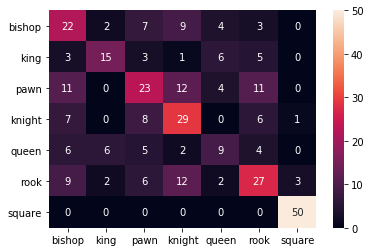

In [16]:
import seaborn as sns
ax = sns.heatmap(cmatrix, annot=True, xticklabels=['bishop','king','pawn','knight','queen','rook','square'],yticklabels=['bishop','king','pawn','knight','queen','rook','square'])

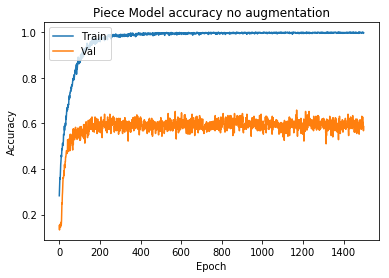

In [17]:
plt.plot(piece_hist.history['acc'])
plt.plot(piece_hist.history['val_acc'])
plt.title('Piece Model accuracy no augmentation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

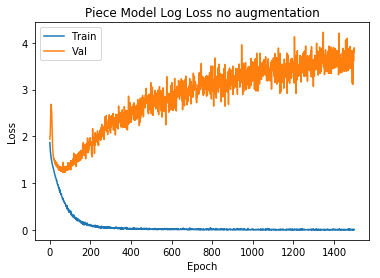

In [18]:
plt.plot(piece_hist.history['loss'])
plt.plot(piece_hist.history['val_loss'])
plt.title('Piece Model Log Loss no augmentation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [19]:
from sklearn.metrics import log_loss
log_loss_result = log_loss(piece_test_iter.classes,piece_pred)
print(log_loss_result)

1.28927844239
